# Forecasting Exercises - Solutions

This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
df.head()

348


,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

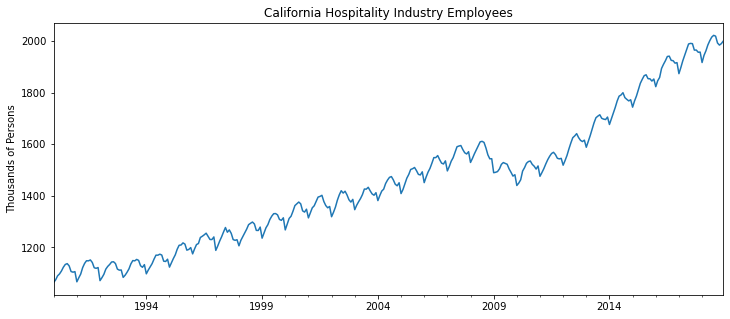

In [3]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [4]:
#There's seasonality, don't forget real world reasons.
#Shock - the recession. Things you can do to model for this
    #exogenous variables as well.
    #if you used unemployment number. you'd have to shift the numbers
    #some information might only come out on a quarterly basis so you'd have to work with that as well

### 2. Run an ETS Decomposition
Use an 'additive' model.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots


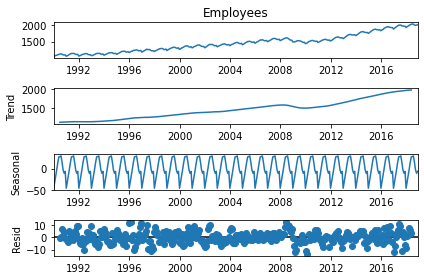

In [6]:
# DON'T WRITE HERE
result = seasonal_decompose(df['Employees'], model='additive')
result.plot();

Based on the previous two plots, do you think the data is stationary? Explain why or why not.

In [7]:
# your answer here
'''No, the plotted shows an upward trend which is confirmed by the trend graph.
There is also a clear seasonal trend that appears to run on a yearly basis.'''

'No, the plotted shows an upward trend which is confirmed by the trend graph.\nThere is also a clear seasonal trend that appears to run on a yearly basis.'

### 3. Use the <tt>test_staionarity</tt>  function below to determine if the data is stationary.

In [8]:
#In options for .rolling, there's a min_periods.
    #so min period can be 3, windows can be 12. 

In [9]:
from statsmodels.tsa.stattools import adfuller

# This funciton provides you with many different types 
# of information to evaluate the stationarity of the data

def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

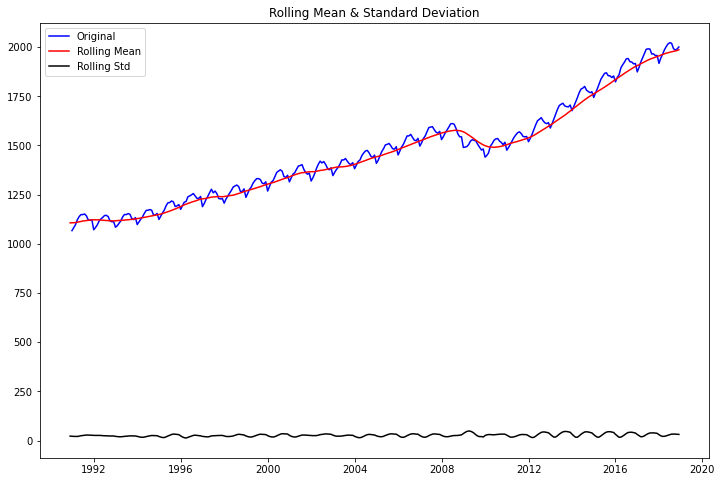

Results of Dickey-Fuller Test:
Test Statistic                   0.901284
p-value                          0.993107
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [10]:
test_stationarity(df, 12)

**Based on the ifrmation provided above, do you think the data set is stationary?**

In [11]:
# your answer here
'''No, the p-value is .99 which is above the alpha of .05.
It is highly likely that the data is not stationary.'''


'No, the p-value is .99 which is above the alpha of .05.\nIt is highly likely that the data is not stationary.'

### 4. Transform the data to make it more stationary. After doing so, rerun the function to see if your transformation worked. 

Some possible data transformations are subtractings the moving average, taking a first difference, taking a seasonal difference, or doing all of them. 

In [12]:
# transformation code

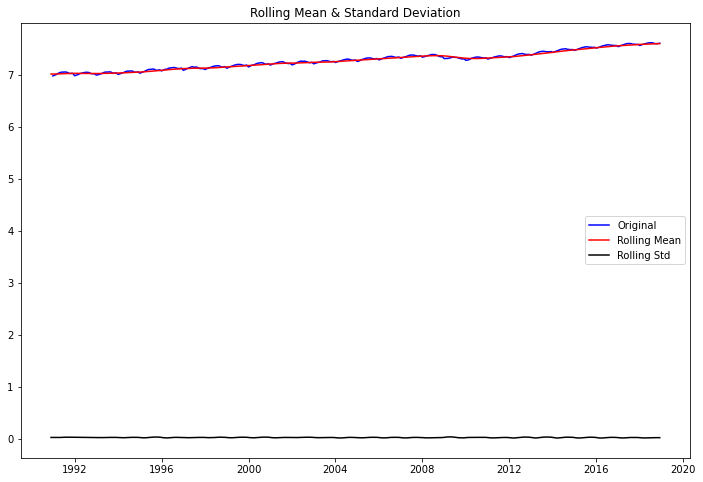

Results of Dickey-Fuller Test:
Test Statistic                   0.376334
p-value                          0.980588
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [13]:
# run the test_stationarity on your transformed data
test_stationarity(np.log(df), 12)

In [14]:
rol_mean = np.log(df).rolling(window = 8).mean()
minus_rol_mean_df = np.log(df) - rol_mean
minus_rol_mean_df.dropna(inplace = True)

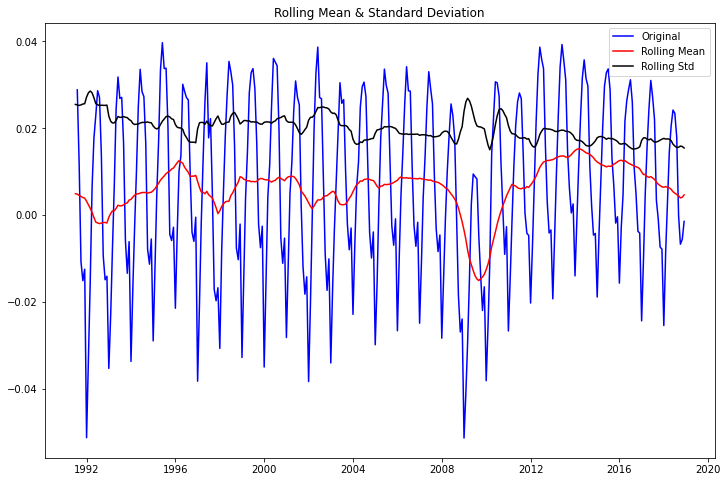

Results of Dickey-Fuller Test:
Test Statistic                  -3.553763
p-value                          0.006709
#Lags Used                      17.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64


In [15]:
test_stationarity(minus_rol_mean_df, 12)

In [16]:
#first difference, seasonal difference
#first difference andd seasonal difference can go in either order.
#diff_df = minus_rol_mean_df.diff().dropna()
diff_df = df.diff().dropna()

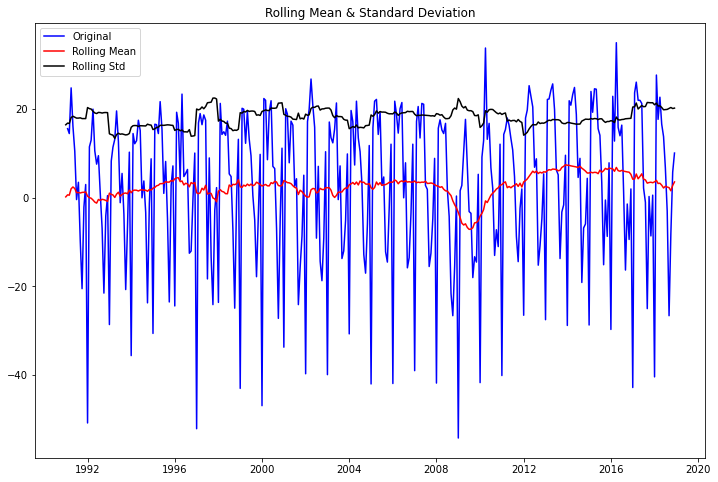

Results of Dickey-Fuller Test:
Test Statistic                  -3.068279
p-value                          0.028992
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [17]:
test_stationarity(diff_df, 12)

In [18]:
#taking the first difference of the seasonal difference is much better. Didn't have to log or anything.

### 5. Split the data into train/test sets
Set one year (24 records) for testing. There is more than one way to do this!

In [67]:
train = df.iloc[:len(df) - 24]
test = df.iloc[len(df) - 24:]

In [46]:
print(train.shape)
print(test.shape)

(324, 1)
(24, 1)


### 5. Using the pre-written code below, determine which set of parameters creates the best model based on the AIC score, and use those parameters to fit a new model.

In [21]:
import itertools

p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))#the 1 is hardcoded in because it was effective above
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 2, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 2, 12)
SARIMAX: (0, 1, 0) x (2, 1, 0, 12)
SARIMAX: (0, 1, 0) x (2, 1, 1, 12)
SARIMAX: (0, 1, 0) x (2, 1, 2, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 2, 12)
SARIMAX: (0, 1, 1) x (2, 1, 0, 12)
SARIMAX: (0, 1, 1) x (2, 1, 1, 12)
SARIMAX: (0, 1, 1) x (2, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 0, 12)
SARIMAX: (0, 1, 2) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
SARIMAX: (0, 1, 2) x (1, 1, 2, 12)
SARIMAX: (0, 1, 2) x (2, 1, 0, 12)
SARIMAX: (0, 1, 2) x (2, 1, 1, 12)
SARIMAX: (0, 1, 2) x (2, 1, 2, 12)
SARIMAX: (1, 1, 0) 

In [22]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2071.810345220941
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1882.8539681353
ARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1810.0929923706685
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1929.8374492999872
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1884.6503569353747
ARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1810.442733591084
ARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1831.954602361433
ARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1818.8336656696097
ARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1812.4281881725447
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:2067.869272090235
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1878.869798223248
ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1806.9737683116984
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1931.8373570811218
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1880.668468116354
ARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1806.4110113967668
ARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1833.3086709140723
ARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1820.4188174887108
ARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1808.4065366115499
ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:20

C:\Users\IM\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1768.2639328929963
ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1899.074294695336
ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1843.340018016474
ARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1769.0154991427135
ARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1789.7869544328873
ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1776.0381825021225


C:\Users\IM\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1772.4877012135833


In [69]:
sari_mod =SARIMAX(train,
                  order=(1, 1, 2),
                  seasonal_order=(0, 1, 2, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [25]:
#above you can put exod = df[whatever]
#trends.google.com
#exogenous matches daate index of dataset. When thinking of how to arrange it,
#think of weather. weather can be hourly, if data is per day, do you taake mix, maax, average?

### 6. Obtain predicted values

In [68]:
train = train*.8

In [61]:
train

,Employees
Date,
1990-01-01,532.25
1990-02-01,537.25
1990-03-01,545.00
1990-04-01,548.70
1990-05-01,554.35
...,...
2016-08-01,970.75
2016-09-01,962.60
2016-10-01,961.90


In [70]:
# Your predictions need to start at the end of the training data and go to the end.
start=len(train)
end=len(train)+len(test)-1
predictions = sari_mod.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [71]:
predictions

2017-01-01    1508.721566
2017-02-01    1524.746788
2017-03-01    1538.389680
2017-04-01    1558.597581
2017-05-01    1575.165504
2017-06-01    1588.094073
2017-07-01    1595.685272
2017-08-01    1598.796668
2017-09-01    1586.087022
2017-10-01    1581.491186
2017-11-01    1575.616393
2017-12-01    1580.006606
2018-01-01    1555.056776
2018-02-01    1571.366650
2018-03-01    1584.895801
2018-04-01    1605.724277
2018-05-01    1622.140195
2018-06-01    1635.035703
2018-07-01    1643.095263
2018-08-01    1646.139825
2018-09-01    1633.478256
2018-10-01    1629.200474
2018-11-01    1623.268800
2018-12-01    1627.534787
Freq: MS, Name: SARIMA Predictions, dtype: float64

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

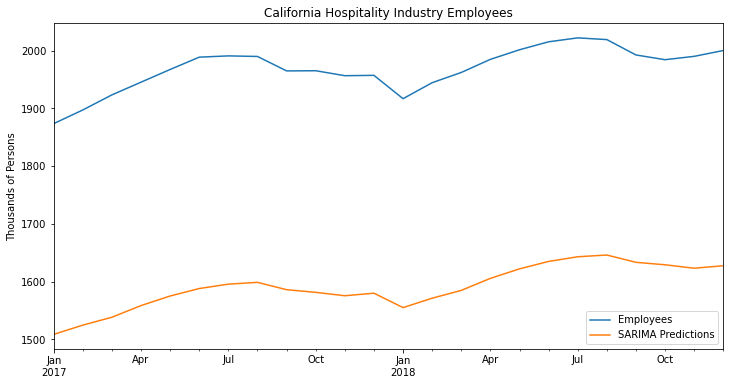

In [72]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

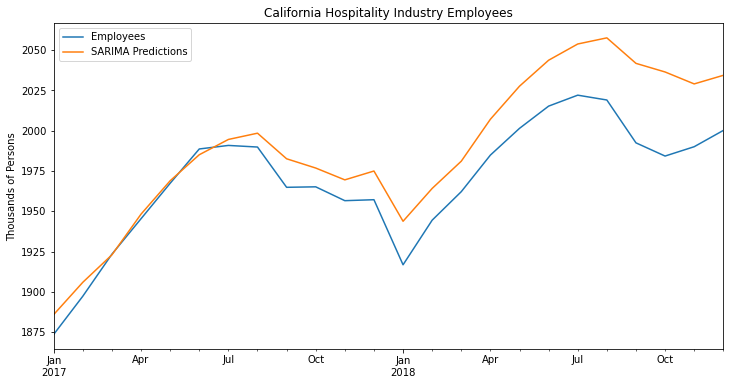

In [28]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [29]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [30]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA MSE Error: {error1:11.10}')
print(f'SARIMA RMSE Error: {error2:11.10}')

SARIMA MSE Error: 628.6600499
SARIMA RMSE Error: 25.07309414


### 9. Retrain the model on the full data and forecast one year into the future

In [31]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(0, 1, 2, 12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA Forecast')

In [32]:
# Here are the steps ahead to predict
sari_mod.forecast(24)

2017-01-01    1885.901940
2017-02-01    1905.933502
2017-03-01    1922.987237
2017-04-01    1948.247066
2017-05-01    1968.957037
2017-06-01    1985.117833
2017-07-01    1994.606759
2017-08-01    1998.496053
2017-09-01    1982.609047
2017-10-01    1976.864134
2017-11-01    1969.520680
2017-12-01    1975.008495
2018-01-01    1943.821122
2018-02-01    1964.208409
2018-03-01    1981.119879
2018-04-01    2007.155359
2018-05-01    2027.675256
2018-06-01    2043.794661
2018-07-01    2053.868995
2018-08-01    2057.674698
2018-09-01    2041.847745
2018-10-01    2036.500374
2018-11-01    2029.085784
2018-12-01    2034.418284
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
#.predict and .forecast. forecast will start at one point and then predict into the future
    #but without endogenous variables. if there's no seasonality, it'll end up with a straight trend line
        #isn't really pretty, but will just continue trend. You can make it better with endogenous or something though
    #if you say dynamic = True. It'll behave like aa forecast.
        #dynamic = false, it's looking at one period ahead.
        # if true, stops using endogenous variables, but starts using only predictions to continue the future ones.

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

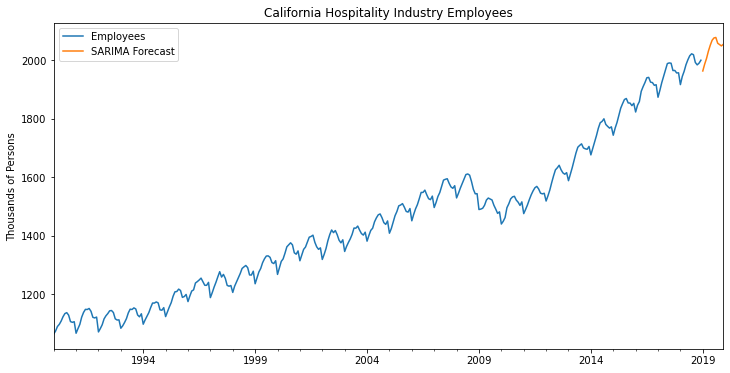

In [34]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df.plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Great job!